# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import data

In [2]:
# Import data
df_co2 = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
df_co2.head()

# Check columns in dataframe
print("Initial columns:", df_co2.columns.tolist())

# Calculate a column for gdp per capita, filter the relevant columns and make a copy of the data
df_co2['gdp_per_capita'] = df_co2['gdp'] / df_co2['population']
df_co2 = df_co2[['country', 'year', 'co2_per_capita', 'gdp_per_capita', 'population', 'energy_per_capita']].copy()

# Make a copy of the dataframe
df = df_co2.copy()
df.head()

Initial columns: ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_ox

,country,year,co2_per_capita,gdp_per_capita,population,energy_per_capita
0,Afghanistan,1750,NaN,NaN,2802560.0,NaN
1,Afghanistan,1751,NaN,NaN,NaN,NaN
2,Afghanistan,1752,NaN,NaN,NaN,NaN
3,Afghanistan,1753,NaN,NaN,NaN,NaN
4,Afghanistan,1754,NaN,NaN,NaN,NaN


# Check and clean data

In [3]:
# Drop rows with missing values
df.dropna(inplace=True)
df

# casting to a type
co2_per_capita_sorted = np.sort(df.loc[:,'co2_per_capita'])
co2_per_capita_sorted

gdp_per_capita = np.sort(df.loc[:,'gdp_per_capita'])
gdp_per_capita

energy_per_capita = np.sort(df.loc[:,'energy_per_capita'])
energy_per_capita

# Looking at all the unique values
df.loc[:,'co2_per_capita'].unique()
df.loc[:,'gdp_per_capita'].unique()
df.loc[:,'energy_per_capita'].unique()
df.loc[:,'population'].unique()
df.loc[:,'country'].unique()

# Drop world from column country
df = df[df['country'] != 'World']

# Rename Democratic Republic of Congo to avoid long text. Wikipedia: To avoid confusion; the former Belgian Congo became also the Democratic Republic of the Congo (DR Congo), while the former French colony retained the name 'Republic of the Congo' (Congo).
df['country'] = df['country'].replace('Democratic Republic of Congo', 'DR Congo')

<ipython-input-3-87572724a39c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].replace('Democratic Republic of Congo', 'DR Congo')


In [ ]:
df.loc[:,'country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'DR Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica',

#1.	Biggest predictor of CO2 output

                   co2_per_capita  gdp_per_capita  energy_per_capita
co2_per_capita           1.000000        0.572706           0.724006
gdp_per_capita           0.572706        1.000000           0.769521
energy_per_capita        0.724006        0.769521           1.000000


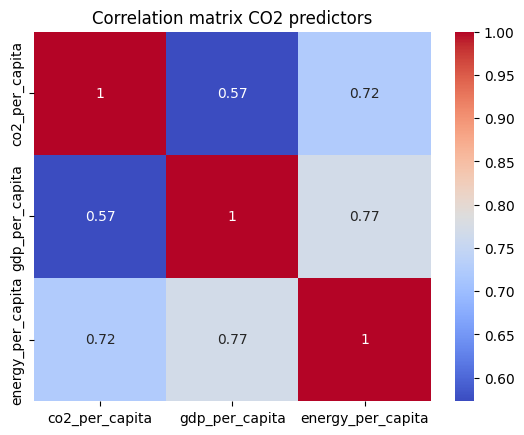

In [4]:
# Check correlation matrix
correlation = df[['co2_per_capita', 'gdp_per_capita', 'energy_per_capita']].corr()
print(correlation)

# Plot correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation matrix CO2 predictors")
plt.show()

In [5]:
# Analyse the relation between co2 per capita ans other factors based on the last 10 years (2013-2022)
recent_years = df['year'].max()
recent_10_years = df['year'].tail(10)
df_10y = df[df['year'] >= (recent_years - 10 + 1)].copy()
df_10y.head()
df_10y.loc[:,'year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

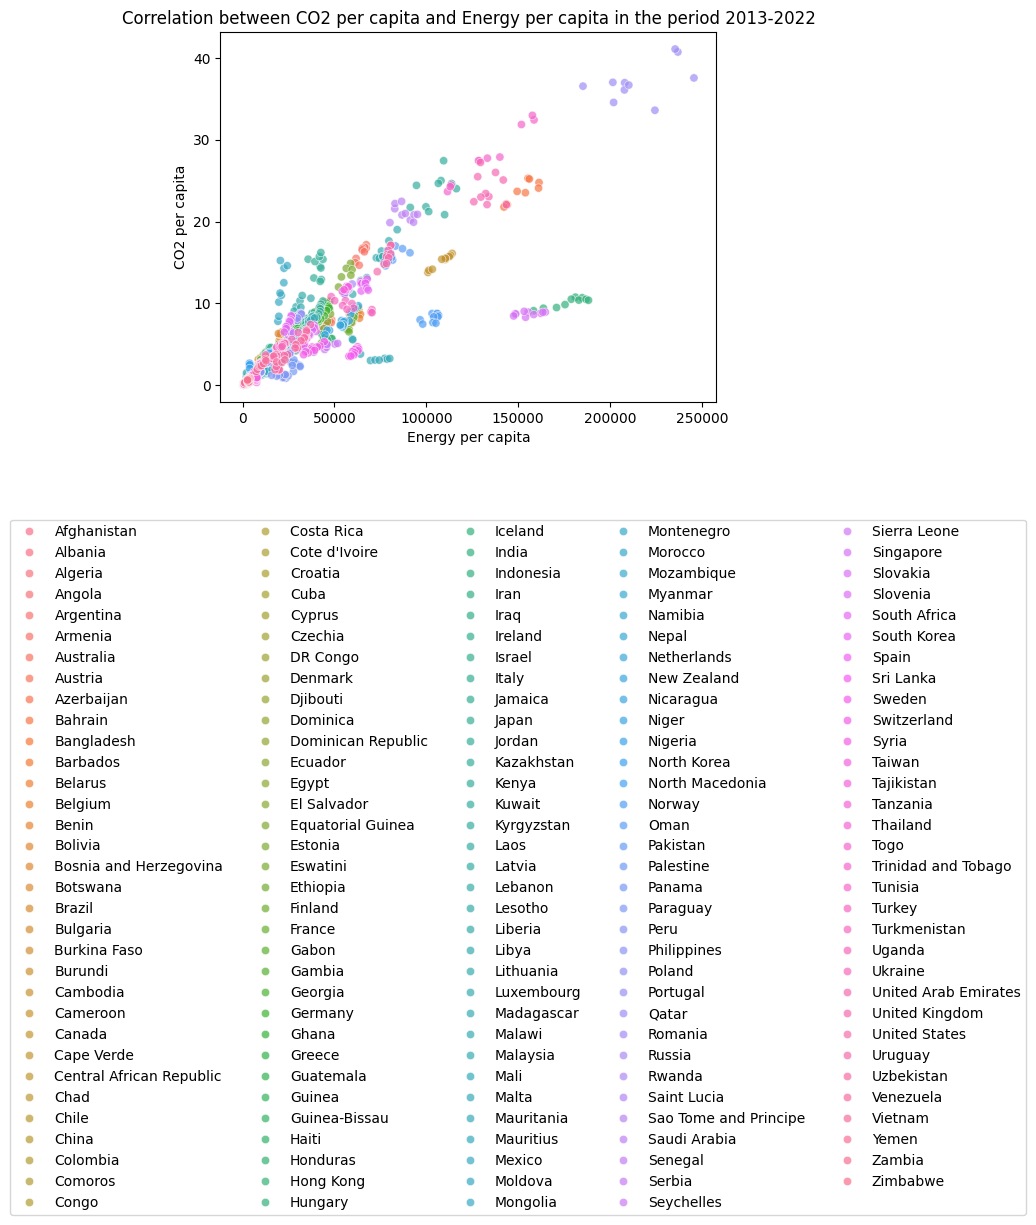

In [6]:
# 1e plot correlation between CO2 per capita and Energy per capita
sns.scatterplot(data=df_10y, x='energy_per_capita', y='co2_per_capita', hue='country', alpha=0.7)
plt.title('Correlation between CO2 per capita and Energy per capita in the period 2013-2022')
plt.xlabel('Energy per capita')
plt.ylabel('CO2 per capita')
plt.legend(bbox_to_anchor=(0.6, -0.3), loc='upper center', ncol=5)
plt.show()

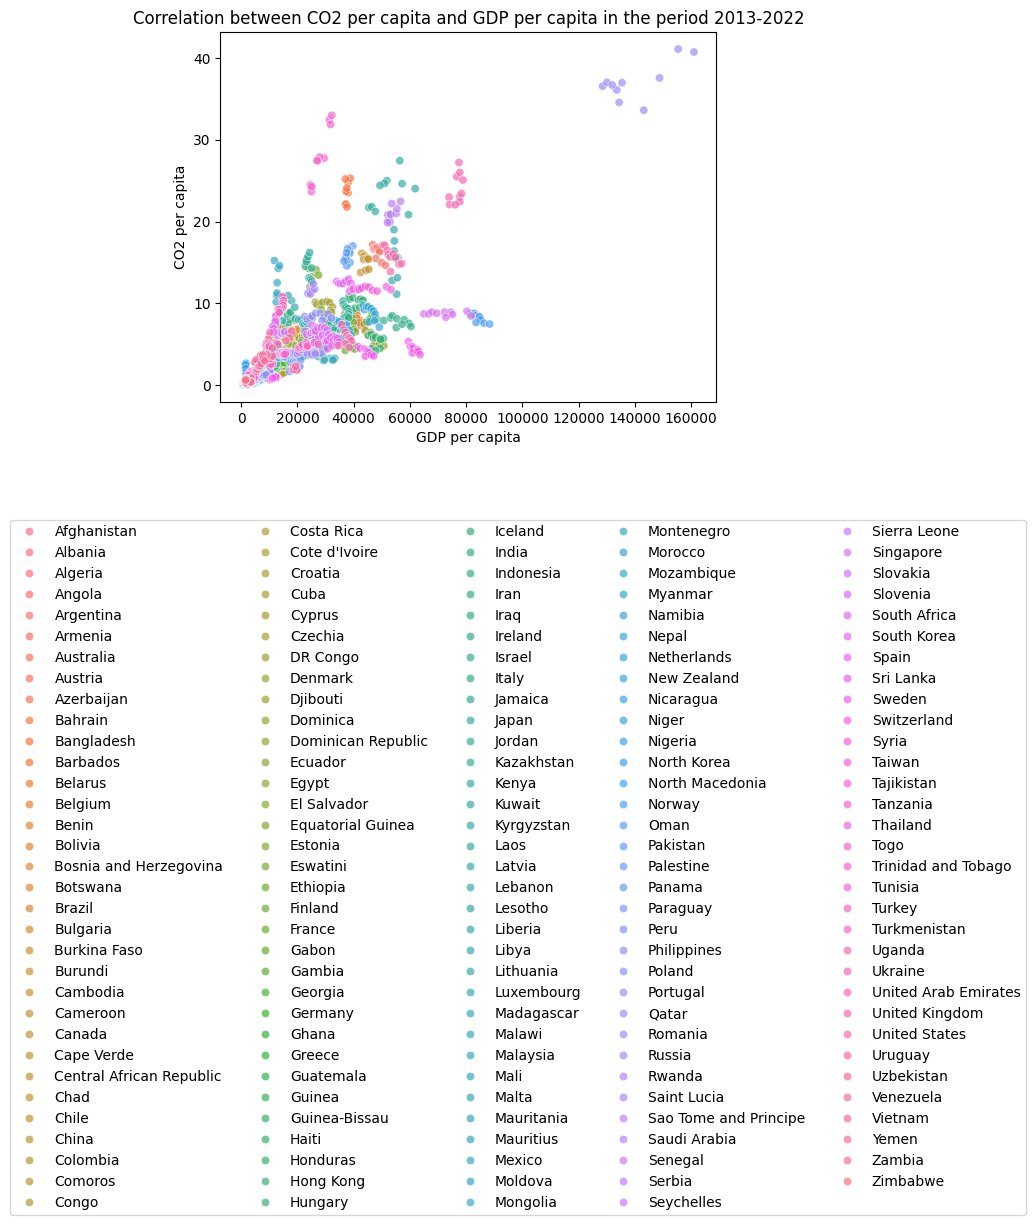

In [7]:
# 2e plot correlation between CO2 per capita and GDP per capita
sns.scatterplot(data=df_10y, x='gdp_per_capita', y='co2_per_capita', hue='country', alpha=0.7)
plt.title('Correlation between CO2 per capita and GDP per capita in the period 2013-2022')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per capita')
plt.legend(bbox_to_anchor=(0.6, -0.3), loc='upper center', ncol=5)
plt.show()

#2.	Which countries are making the biggest strides in decreasing CO2 output?

             first    last  percentage_change
country                                      
Liberia      1.056   0.149         -85.890152
Ukraine     14.546   3.438         -76.364636
Gabon        8.852   2.327         -73.712155
Luxembourg  36.981  11.138         -69.881831
Kuwait      67.905  21.235         -68.728371


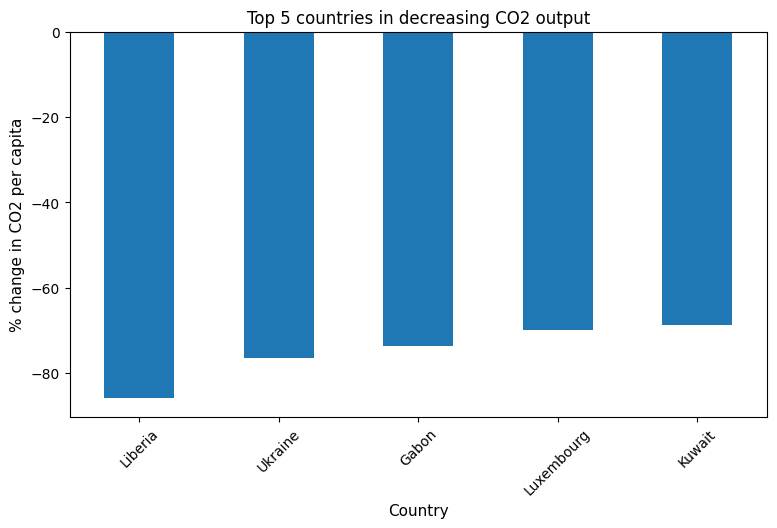

In [8]:
# Calculate % of change in CO2 emissions per capita by calculating the relative change in CO2 emissions
df_co2_change = df.groupby('country')['co2_per_capita'].agg(['first', 'last']).dropna()
df_co2_change['percentage_change'] = ((df_co2_change['last'] - df_co2_change['first']) / df_co2_change['first']) * 100

# Top countries in decreasing CO2 output
df_top_decreasing_co2 = df_co2_change.sort_values(by='percentage_change').head(5)
print(df_top_decreasing_co2)

# Plot of top countries in decreasing CO2 output
df_top_decreasing_co2['percentage_change'].plot(kind='bar', figsize=(9, 5))
plt.title('Top 5 countries in decreasing CO2 output')
plt.ylabel('% change in CO2 per capita', fontsize=11)
plt.xlabel('Country', fontsize=11)
plt.xticks(rotation=45)
plt.show()


#3.	Which non-fossil fuel energy technology will have the best price in the future?

In [9]:
# Import data
df_energydata = pd.read_csv("https://ourworldindata.org/grapher/levelized-cost-of-energy.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Check columns in dataframe
print("Initial columns:", df_energydata.columns.tolist())
df_energydata

# Make a copy of the dataframe
df_energy = df_energydata.copy()

# Drop rows with missing values
df_energy.dropna(inplace=True)
df_energy.head(10)

# Looking at all the unique values
df_energy.loc[:,'bioenergy'].unique()
df_energy.loc[:,'geothermal'].unique()
df_energy.loc[:,'offshore_wind'].unique()
df_energy.loc[:,'solar_photovoltaic'].unique()
df_energy.loc[:,'concentrated_solar_power'].unique()
df_energy.loc[:,'hydropower'].unique()
df_energy.loc[:,'onshore_wind'].unique()

df_energy.head(10)

Initial columns: ['Entity', 'Code', 'Year', 'bioenergy', 'geothermal', 'offshore_wind', 'solar_photovoltaic', 'concentrated_solar_power', 'hydropower', 'onshore_wind']


,Entity,Code,Year,bioenergy,geothermal,offshore_wind,solar_photovoltaic,concentrated_solar_power,hydropower,onshore_wind
785,World,OWID_WRL,2010,0.084326,0.054378,0.202551,0.460012,0.396387,0.043136,0.110677
787,World,OWID_WRL,2012,0.069340,0.093416,0.179078,0.255652,0.368945,0.042199,0.095888
788,World,OWID_WRL,2013,0.088780,0.069449,0.152580,0.196782,0.293328,0.047163,0.096676
789,World,OWID_WRL,2014,0.088804,0.070826,0.186408,0.176991,0.255818,0.036747,0.086488
790,World,OWID_WRL,2015,0.078206,0.063738,0.152099,0.132362,0.246006,0.040573,0.074434
791,World,OWID_WRL,2016,0.076558,0.073564,0.124148,0.115932,0.290460,0.053683,0.068879
792,World,OWID_WRL,2017,0.076438,0.076960,0.114745,0.091176,0.278293,0.056271,0.064615
793,World,OWID_WRL,2018,0.059010,0.074275,0.108094,0.077332,0.163500,0.044195,0.054764
794,World,OWID_WRL,2019,0.069156,0.073327,0.093179,0.067467,0.241610,0.045939,0.047995
795,World,OWID_WRL,2020,0.077995,0.061647,0.088160,0.060086,0.121824,0.050994,0.039882


Slope for bioenergy: -0.0012931571432517753 Decreasing
Slope for geothermal: -0.00026787141041831114 Decreasing
Slope for offshore_wind: -0.010572899234411995 Decreasing
Slope for solar_photovoltaic: -0.02534904196685081 Decreasing
Slope for concentrated_solar_power: -0.02199490439936858 Decreasing
Slope for hydropower: 0.00129390802249408 Increasing
Slope for onshore_wind: -0.00655223560694554 Decreasing


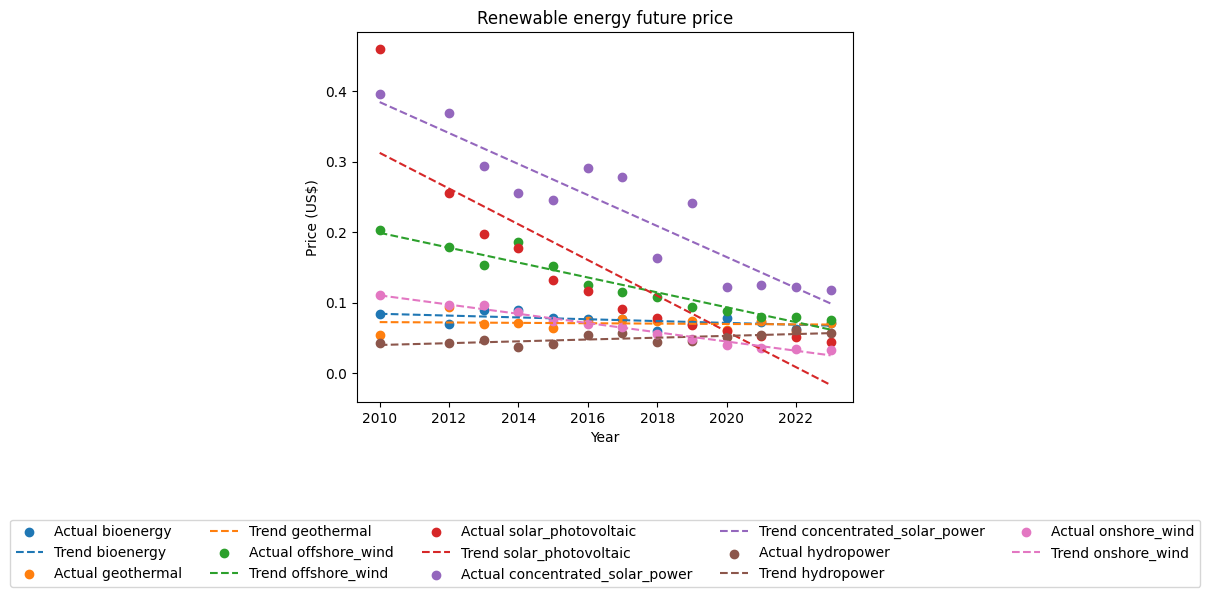

Renewable energy future price 2030: {'bioenergy': 0.05811871020363091, 'geothermal': 0.06682224163299133, 'offshore_wind': -0.012474885757693954, 'solar_photovoltaic': -0.19451307010497487, 'concentrated_solar_power': -0.05533663506867015, 'hydropower': 0.06556437467876908, 'onshore_wind': -0.020911666244673555}


In [10]:
# Please note; In the analysis, the costs per renewable energy are used to calculate the future price, because there was no data with specific the price information
# So we assume that the price is equal to the costs of the renewable energy to calculate the future price

# linear regression to predict the future price
X = df_energy['Year'].values.reshape(-1, 1)
future_price = {}

# Loop through each energy type
for energy_type in ['bioenergy', 'geothermal', 'offshore_wind', 'solar_photovoltaic', 'concentrated_solar_power', 'hydropower', 'onshore_wind']:
    y = df_energy[energy_type].values

    # Fit regression model
    model = LinearRegression()
    model.fit(X, y)

    # Check increase or decrease
    y = df_energy[energy_type].values
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    print(f"Slope for {energy_type}: {slope} {'Increasing' if slope > 0 else 'Decreasing'}")

    # Predict future price (year 2030)
    future_year = np.array([[2030]])
    future_price[energy_type] = model.predict(future_year)[0]

    # Plot data and regression line
    plt.scatter(X, y, label=f'Actual {energy_type}')
    plt.plot(X, model.predict(X), label=f"Trend {energy_type}", linestyle='--')

plt.title('Renewable energy future price')
plt.ylabel('Price (US$)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=5)
plt.show()

print('Renewable energy future price 2030:', future_price)